# Select Stay Inflow UI Test Result
---

### 요약
---

본 분석의 실험은 Firebase를 통해 23. 11. 24 ~ 23. 12. 06 까지 진행되었습니다. 메인페이지 방문자를 대상으로 진행하였으며, 신규서비스(셀렉스테이)의 전환을 유도하는 UI를 추가한 3가지 대안과 원안의 종합 상세 전환율, 셀렉스테이 메인 전환율을 비교하였습니다.<br><br>
이를 통해 얻은 데이터를 전처리 과정을 통해 유효한 730명의 데이터를 토대로 분석을 진행하였습니다.<br><br>
셀렉스테이 서비스로 유입을 증대시킬 수 있는 UI를 도입을 위한 목적으로 시행 되었습니다.<br><br>
가설 검증을 위해서는 Bayesian Binary Test, Chi-squared Test를 진행하였습니다.<br><br>
분석 결과 bottom_bar UI가 최선의 대안으로 나왔으며, 가드레일 지표는 pop_up UI만 이상이 확인되었습니다.<br><br>
이를 통해 기존에 사용했던 pop_up에 대한 성능을 의심해볼 필요가 있음을 확인할 수 있었으며,(성능 최하위, 이탈 최상위) 유저에게 자연스럽게 클릭을 유도할 수 있는 UI가 효과적임을 알 수 있었습니다.<br><br>
본 분석은 실험의 모수가 충분치 않고, 내재적 요인을 고려하지 않았으며, 기술 상 오류가 있을 수 있고, 앱,웹 종합적인 초기 이탈만 가드레일 지표로 확인한 점 때문에 실제에 바로 적용할 수 없습니다. 따라서 추가적인 후속 실험이 진행되어야 합니다.

<br>

### 목차
---

1. 실험 설계<br>
1-1) 실험 개요<br>
1-2) 원안<br>
1-3) 대안<br><br>
2. 가설<br>
2-1) 가설 모델(가드레일)<br>
2-2) 변수 정의<br><br>
3. Data<br>
3-1) 데이터 전처리 쿼리<br>
3-2) 분석 데이터<br>
3-2-1) 목표 지표 분석 데이터<br>
3-2-2) 가드레일 지표 분석 데이터<br><br>
4. 분석<br>
4-1) 목표 지표 분석<br>
4-2) 가드레일 지표 분석<br>
4-2-1) bottom_bar UI 추가는 종합 상세 전환에 영향을 미칠 것이다.<br>
4-2-2) top_bar UI 추가는 종합 상세 전환에 영향을 미칠 것이다.<br>
4-2-3) pop_up UI 추가는 종합 상세 전환에 영향을 미칠 것이다.<br>
4-2-4) 이탈률<br><br>
5. 결과<br>
5-1) 결과 요약<br>
5-2) 시사점<br>
5-3) 한계점<br>

<br>

<br>

## 1. 실험 설계
---

### 1-1) 실험 개요
---

- 설명: 셀렉스테이 유입 증대를 위한 UI 변경 실험입니다.
- 실험 기간: 23. 11. 24 ~ 23. 12. 06
- 데이터 소스: BigQuery
- 실험 도구: Firebase
- 표본 집단: experiment_viewed 이벤트 발생자 (앱 스플래시 발생)
- 목표: 셀렉스테이 서비스로 유입을 증대시킬 수 있는 UI를 도입한다.
- 목표 지표: 셀렉스테이 메인페이지 전환율
- 가드레일 목표: 기존 서비스에 악영향을 주면 안 된다.
- 가드레일 지표: 롱스테이 상세페이지 전환율, 셀렉스테이 상세페이지 전환율
- 이상치 판단 기준: 
    1. variation을 2가지 모두 사용한 경우(실험 기능 이상)
    2. isAdim = True인 경우(어드민 계정 표본 제외)
    3. /hotel/356/options 접속한 경우 (브리드 양양의 경우 실험 제외했기 때문에)
- 유효 표본 수: 730건

<br>

### 1-2) 원안
---

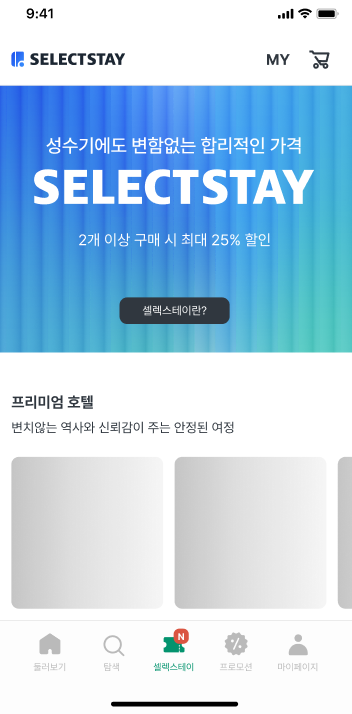

In [8]:
from IPython.display import Image
Image(filename='./image/control.png')

하단 탭바 셀렉스테이 부분에 N표기

<br>

### 1-3) 대안
---

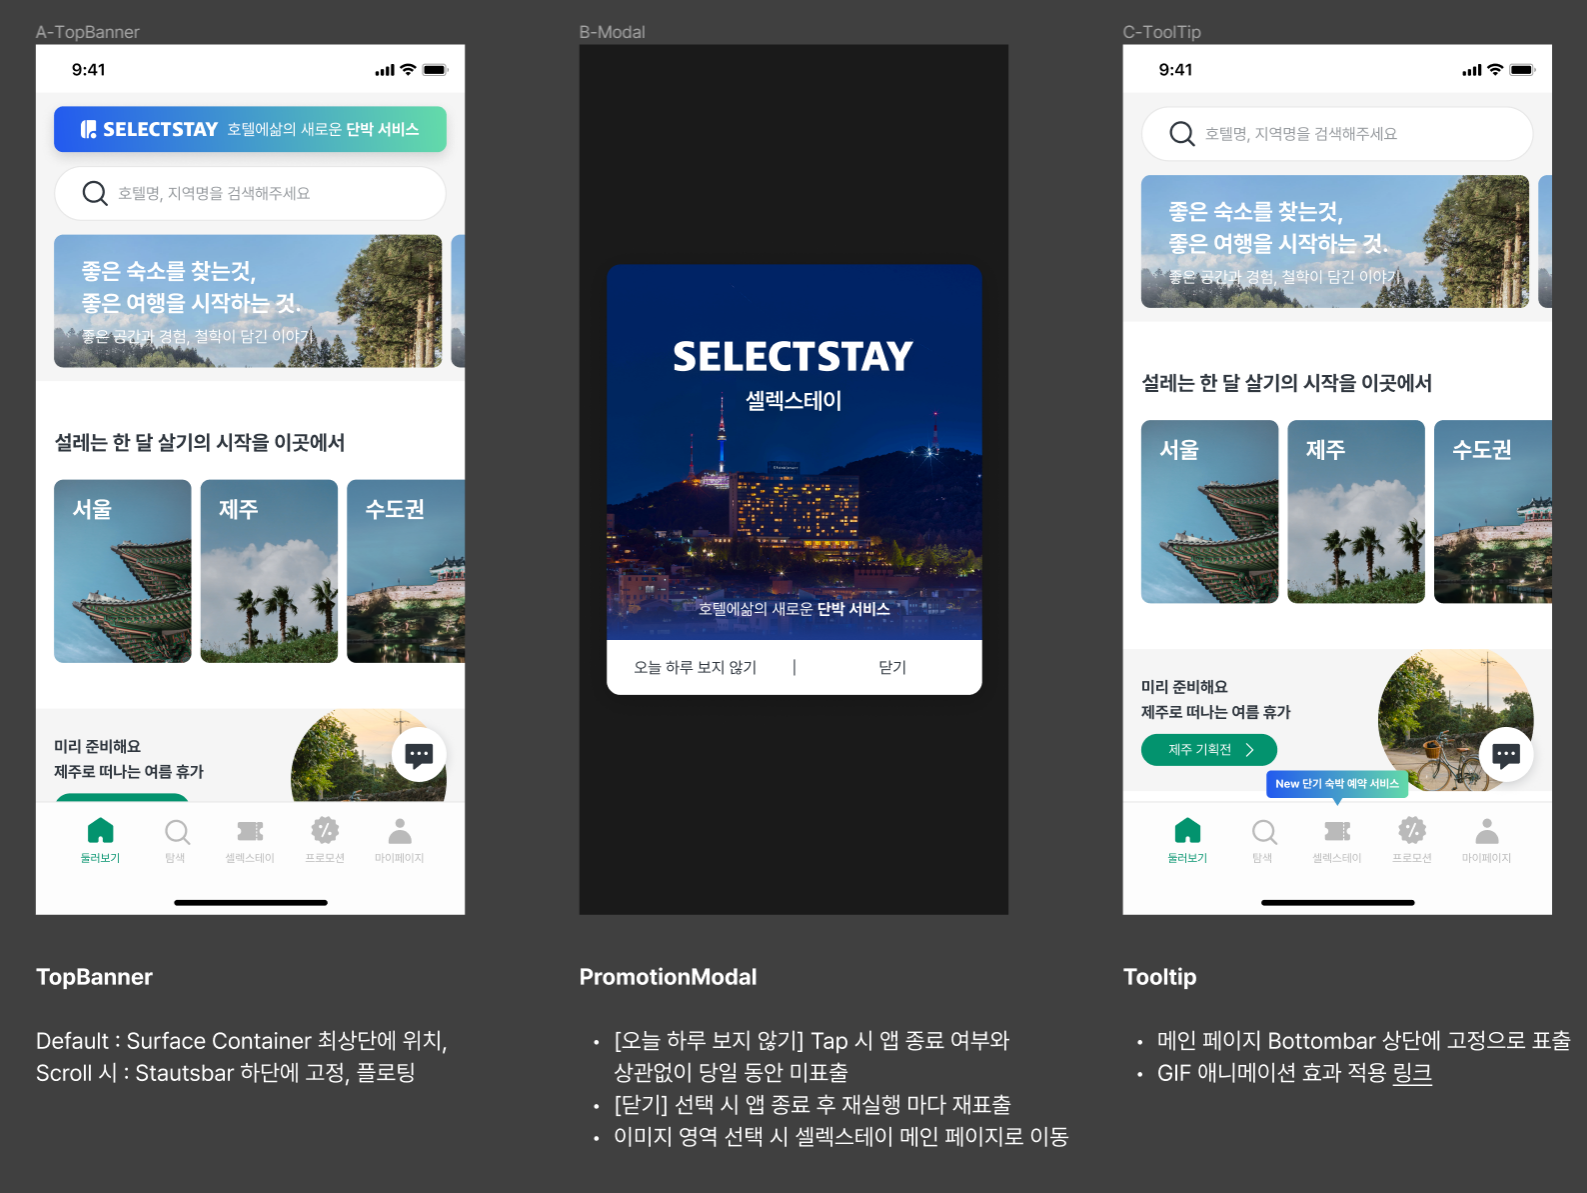

In [9]:
Image(filename='./image/variation.png')

- TopBanner: 실험 변수 top_bar
- PromotionMadal: 실험 변수 pop_up
- Tooltip: 실험 변수 bottom_bar
<br>
컨텐츠의 영향을 최소화 하기 위해 랜딩페이지는 셀렉스테이 메인으로 통일, 문구도 통일하여 진행

<br>

<br>

## 2. 가설
---

- 목표 지표 검정(베이지안 검정)은 가설 설정을 생략합니다.

### 2-1) 가설 모델(가드레일)
---

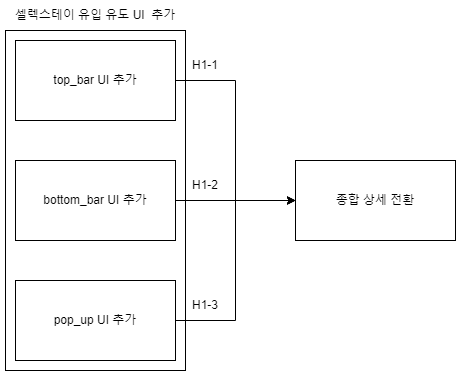

In [10]:
from IPython.display import Image
Image(filename='./image/셀렉스테이 유입 유도 실험.drawio.png')

- H0: 셀렉스테이 유입 유도 UI 추가는 종합 상세 전환에 영향을 미치지 않을 것이다.
- H1: 셀렉스테이 유입 유도 UI 추가는 종합 상세 전환에 영향을 미칠 것이다.
    - H1-1: top_bar UI 추가는 종합 상세 전환에 영향을 미칠 것이다.
    - H1-2: bottom_bar UI 추가는 종합 상세 전환에 영향을 미칠 것이다.
    - H1-3: pop_up UI 추가는 종합 상세 전환에 영향을 미칠 것이다.

<br>

### 2-2) 변수 정의
---

- 셀렉스테이 유입 유도 UI 추가: 앱 메인에서 셀렉스테이 메인으로 쉽게 유입되도록 UI를 추가하는 것
- 종합 상세 전환: 기존 서비스(롱스테이)의 상세 전환, 셀렉스테이의 상세 전환을 합친 것

<br>

## 3. Data
---

### 3-1) 데이터 전처리 쿼리
---

- 목표 지표 데이터: query(target).txt 확인
- 가드레일 지표 데이터: query(guardrail).txt 확인

<br>

### 3-2) 분석 데이터
---

#### 3-2-1) 목표 지표 분석 데이터
---

In [11]:
import pandas as pd
from google.oauth2 import service_account
from google.cloud import bigquery
import json

with open('../secret_key/livinginhotel-334006-c751655abe0f.json') as f:
    key = json.load(f)
    
cd = service_account.Credentials.from_service_account_info(key)
client = bigquery.Client(credentials = cd, project = cd.project_id)

with open('./query(target).txt', 'r', encoding= 'utf-8') as query_txt:
    query = query_txt.read()

query_job = client.query(query)
df = query_job.to_dataframe()
df

,variation,is_converted
0,control,1
1,bottom_bar,1
2,bottom_bar,1
3,bottom_bar,1
4,control,1
...,...,...
738,bottom_bar,1
739,pop_up,0
740,pop_up,0
741,top_bar,1


<br>

#### 3-2-2) 가드레일 지표 분석 데이터
---

In [12]:
with open('./query(guardrail).txt', 'r', encoding= 'utf-8') as query_txt:
    query = query_txt.read()

query_job = client.query(query)
df_guardrail = query_job.to_dataframe()
df_guardrail

,variation,converted,not_converted
0,bottom_bar,257,6
1,pop_up,120,29
2,top_bar,130,13
3,control,179,9


<br>

## 4. 분석
---

### 4-1) 목표 지표 분석
---

- Bayesian Test 시행 (Binary)

In [13]:
from bayesian_testing.experiments import BinaryDataTest

control = df[df['variation'] == 'control']['is_converted']
top_bar = df[df['variation'] == 'top_bar']['is_converted']
bottom_bar = df[df['variation'] == 'bottom_bar']['is_converted']
pop_up = df[df['variation'] == 'pop_up']['is_converted']

test = BinaryDataTest()

test.add_variant_data("control", control)
test.add_variant_data("top_bar", top_bar)
test.add_variant_data("bottom_bar", bottom_bar)
test.add_variant_data("pop_up", pop_up)

results = test.evaluate()
pd.DataFrame(results)

,variant,totals,positives,positive_rate,posterior_mean,prob_being_best,expected_loss
0,control,188,139,0.73936,0.73810,0.00565,0.097019
1,top_bar,143,60,0.41958,0.42014,0.00000,0.414809
2,bottom_bar,263,220,0.83650,0.83523,0.99435,0.000082
3,pop_up,149,59,0.39597,0.39667,0.00000,0.437806


**Result: bottom_bar 채택**

<br>

### 4-2) 가드레일 지표 분석
---

- 카이제곱 검정 시행

<br>

#### 4-2-1) bottom_bar UI 추가는 종합 상세 전환에 영향을 미칠 것이다.
---

In [14]:
df_guardrail = df_guardrail.set_index('variation')
from scipy.stats import chi2_contingency

chi2, p_val, dof, expected =  chi2_contingency(df_guardrail.loc[['control','bottom_bar']])

print("Chi-square test result:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square test result:
Chi-square statistic: 1.4326255816359883
P-value: 0.23133641971518099
Degrees of freedom: 1
Expected frequencies:
[[181.74722838   6.25277162]
 [254.25277162   8.74722838]]


**Result: 귀무가설을 기각할 근거가 없습니다.**

<br>

#### 4-2-2) top_bar UI 추가는 종합 상세 전환에 영향을 미칠 것이다.
---

In [15]:
chi2, p_val, dof, expected = chi2_contingency ( df_guardrail.loc[['control', 'top_bar']] )

print ( "Chi-square test result:" )
print ( f"Chi-square statistic: {chi2}" )
print ( f"P-value: {p_val}" )
print ( f"Degrees of freedom: {dof}" )
print ( "Expected frequencies:" )
print ( expected )

Chi-square test result:
Chi-square statistic: 1.7804852650260492
P-value: 0.18208974997860344
Degrees of freedom: 1
Expected frequencies:
[[175.50453172  12.49546828]
 [133.49546828   9.50453172]]


**Result: 귀무가설을 기각할 근거가 없습니다.**

<br>

#### 4-2-3) pop_up UI 추가는 종합 상세 전환에 영향을 미칠 것이다.
---

In [16]:
chi2, p_val, dof, expected = chi2_contingency (df_guardrail.loc[['control', 'pop_up']] )

print ( "Chi-square test result:" )
print ( f"Chi-square statistic: {chi2}" )
print ( f"P-value: {p_val:2f}" )
print ( f"Degrees of freedom: {dof}" )
print ( "Expected frequencies:" )
print ( expected )

Chi-square test result:
Chi-square statistic: 16.457899358827113
P-value: 0.000050
Degrees of freedom: 1
Expected frequencies:
[[166.80118694  21.19881306]
 [132.19881306  16.80118694]]


**Result: 귀무가설을 기각합니다.**

#### 4-2-4) 이탈률
---

In [17]:
df_guardrail['user_churn_rate'] = df_guardrail['not_converted'] / (df_guardrail['converted'] + df_guardrail['not_converted'])
df_guardrail

,converted,not_converted,user_churn_rate
variation,,,
bottom_bar,257,6,0.022814
pop_up,120,29,0.194631
top_bar,130,13,0.090909
control,179,9,0.047872


pop_up이 이탈률 20%로 가장 큽니다.

<br>

<br>

## 5. 결과
---

### 5-1) 결과 요약
---

- 최선의 대안: bottom_bar (최선일 확률: 99.43%)
- 가드레일 지표 이상: pop_up (이탈률: 20%)
<br>
bottom_bar 대안을 적용하는 것을 추천합니다.

<br>

### 5-2) 시사점
---

본 분석의 시사점은 다음과 같습니다.<br><br>
현재 프로모션 등을 위해 가장 많이 사용하는 표출 방법은 팝업입니다. 하지만 본 분석에서 팝업은 성능 최하위, 이탈률 최상위의 지표를 보이고 있습니다. 유저에게 관심이 없는 컨텐츠를 팝업으로 띄우는 것은 성능면으로, 이탈면으로 좋지 않을 가능성이 있습니다. 따라서, 추후 팝업을 띄울 때는 조심스럽게 접근하는 것을 제언드립니다.<br>
또한, 강제적으로 정보를 보여주는 것보다 자연스럽게 유저의 행동을 이끄는 대안이 최선일 확률이 가장 높았습니다. 이는 향후 프로모션 등에서도 적용할 시 좋은 성능을 보여줄 수 있습니다.
<br><br>
따라서 다음과 같은 사항을 제언합니다.<br><br>
1. 추후 팝업 사용 시 실험 적용 후 배포<br>
2. 추후 프로모션 진행 시 유저의 행동을 자연스럽게 유도하는 방식으로 진행 논의<br><br>

<br>

### 5-3) 한계점
---

본 분석의 한계점은 다음과 같습니다.<br><br>
1. 실험의 모수가 충분하지 않았습니다. 초기 step의 이벤트의 경우는 비교적 많은 양을 획득할 수 있었지만, 전환과 관련된 이벤트의 많은 양의 데이터를 확보하지 못하였습니다. 이에 따라 전환과 관련된 실험 결과 해석에 있어서 오류가 발생할 수 있습니다.<br><br>

2. 내재적 요인을 고려하지 않았습니다. 내재적 요인을 평가하기 위한 양적, 질적 연구가 결여된 상태의 실험이기 때문에 행동의 원인을 추측할 수 없습니다. 이에 따라 정확한 인과관계를 밝힐 수 없으며, 실험 결과 해석에 오류가 발생할 수 있습니다. 기존에 추측한 내재적 요인을 토대로 많은 후속실험이 필요합니다.<br><br>

3. 본 실험은 대면으로 조사한 실험이 아니기 때문에 기술 상 오류가 있을 수 있습니다. GA4(BigQuery) 데이터 집계 과정, 전처리 과정에서 잘못된 데이터가 발생했을 수 있습니다. 또한 내부 직원의 데이터가 집계되었을 가능성이 있으며, 한 명의 유저가 다수의 유저로 인식될 가능성이 있습니다. 따라서 검정 데이터에 결점이 있을 수 있습니다.<br><br>

4. 본 실험의 가드레일 지표는 상세페이지 전환까지만 확인하였기 때문에, 롱스테이/셀렉스테이 전환 비율, 결제 비율 등에 대해서는 예상과 다른 결과가 확인될 수 있습니다.